In [1]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn.datasets import fetch_olivetti_faces
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X ,y = fetch_olivetti_faces(return_X_y=True)

In [3]:
X.shape, y.shape

((400, 4096), (400,))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=42)

In [5]:
np.unique(y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8], dtype=int64))

In [6]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4096,)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(40, activation='softmax')])

In [7]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [8]:
weights, biases = model.get_layer('dense').get_weights()

In [9]:
weights.shape, biases.shape

((4096, 100), (100,))

In [10]:
model.fit(X_train, y_train, epochs=30,validation_data=(X_test, y_test))

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0363 - loss: 3.9695 - val_accuracy: 0.0250 - val_loss: 3.7172
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0358 - loss: 3.6839 - val_accuracy: 0.0625 - val_loss: 3.6190
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0683 - loss: 3.5927 - val_accuracy: 0.0750 - val_loss: 3.5528
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0734 - loss: 3.5230 - val_accuracy: 0.1375 - val_loss: 3.4888
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1400 - loss: 3.4656 - val_accuracy: 0.0875 - val_loss: 3.4225
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1241 - loss: 3.3647 - val_accuracy: 0.1125 - val_loss: 3.3402
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1369 - loss: 3.2706 - val_accuracy: 0.1375 - val_loss: 3.2421
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1497 - loss: 3.1854 - val_accuracy: 0.2000 - val_los

In [11]:
model_history_df = pd.DataFrame(model.history.history)

In [12]:
model_history_df.head()

,accuracy,loss,val_accuracy,val_loss
0,0.028125,3.939949,0.0250,3.717219
1,0.037500,3.690451,0.0625,3.618992
2,0.062500,3.588081,0.0750,3.552832
3,0.065625,3.530293,0.1375,3.488809
4,0.125000,3.459576,0.0875,3.422543


<Axes: >

<Figure size 1000x300 with 0 Axes>

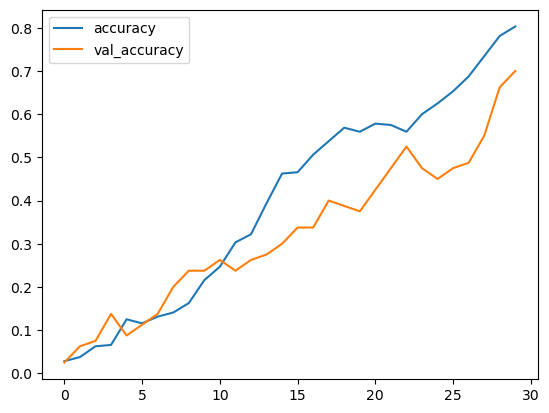

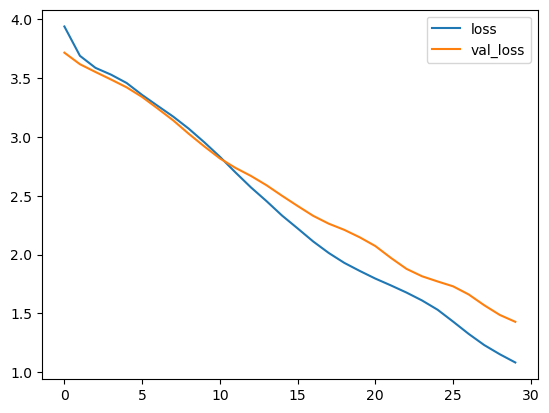

In [13]:
plt.figure(figsize=(10,3))
model_history_df[['accuracy','val_accuracy']].plot()
model_history_df[['loss','val_loss']].plot()

We can see the model is overfitting.

In [14]:
X, y = sklearn.datasets.fetch_california_housing(as_frame=False,  return_X_y=True)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((16512, 8), (16512,), (4128, 8), (4128,))

In [17]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

Now lets make the model. Regression:
We normalize the inputs,
dont use acitvation in output layer
use relu. Lets use the functional api to make multi input and output networks

In [18]:
X_train.shape[1:]

(8,)

In [19]:
# Wide and Deep Neural Network
tf.keras.backend.clear_session()
tf.random.set_seed(42)
input_ = tf.keras.layers.Input(shape=(8,))
normalize_layer = tf.keras.layers.Normalization()
normalized = tf.keras.layers.Normalization()(input_)
hidden1 = tf.keras.layers.Dense(40, activation='relu')(normalized)
hidden2 = tf.keras.layers.Dense(30, activation='relu')(hidden1)
concat = tf.keras.layers.Concatenate()([hidden2, normalized])
output = tf.keras.layers.Dense(1)(concat)

In [20]:
model = tf.keras.Model(inputs=[input_], outputs=[output])

In [21]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 8)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_1               │ (None, 8)                 │              17 │ input_layer[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense (Dense)                 │ (None, 40)                │             360 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_1 (Dense)               │ (None, 30)                │           1,230 │ dense[0][0]                │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 38)                │               0 │ dense_1[0][0],             │
│                               │                           │                 │ normalization_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_2 (Dense)               │ (None, 1)                 │              39 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 1,646 (6.43 KB)

 Trainable params: 1,629 (6.36 KB)

 Non-trainable params: 17 (72.00 B)

In [22]:
normalize_layer.adapt(X_train)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=.001), loss='mse',
              metrics=['root_mean_squared_error'])
model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_valid, y_valid), )

Epoch 1/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4937.2437 - root_mean_squared_error: 60.5174 - val_loss: 18.0481 - val_root_mean_squared_error: 4.2483
Epoch 2/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 14.4863 - root_mean_squared_error: 3.7858 - val_loss: 1.6515 - val_root_mean_squared_error: 1.2851
Epoch 3/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3072 - root_mean_squared_error: 1.1406 - val_loss: 0.9158 - val_root_mean_squared_error: 0.9570
Epoch 4/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9189 - root_mean_squared_error: 0.9583 - val_loss: 0.7982 - val_root_mean_squared_error: 0.8934
Epoch 5/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7941 - root_mean_squared_error: 0.8910 - val_loss: 0.7895 - val_root_mean_squared_error: 0.8886
Epoch 6/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0025 - root_mean_squared_error: 0.9978 - val_loss: 0.7796 - val_root_mean_squared_error: 0.8829
Epoch 7/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms

In [23]:
def plot_metrics(model):
  model_hist = pd.DataFrame(model.history.history)
  plt.figure(figsize=(10,3))
  ax = plt.subplot(121)
  model_hist.iloc[:,[0,2]].plot(ax=ax)
  ax = plt.subplot(122)
  model_hist.iloc[:, [1,3]].plot(ax=ax)

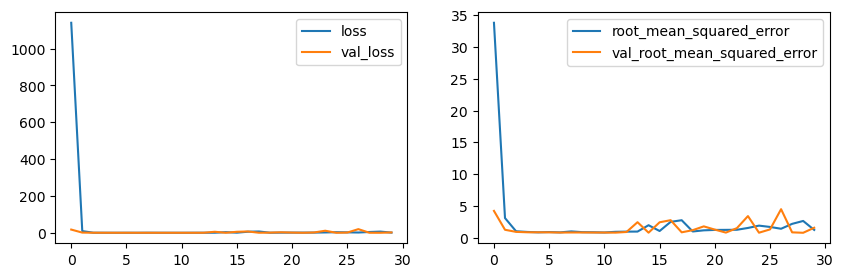

In [24]:
plot_metrics(model)

This model is good i guess. LEts evaluate

In [25]:
model.evaluate(X_test, y_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 2.4752 - root_mean_squared_error: 1.5718


[2.5098116397857666, 1.5842385292053223]

This time with batch size 64

In [26]:
model.history.history

{}

Normal sequential network

In [27]:
tf.keras.backend.clear_session()
norm_layer = tf.keras.layers.Normalization(input_shape=(8,))
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(30, activation='relu'),
    tf.keras.layers.Dense(1)
])

E:\Anaconda\envs\DL_general\lib\site-packages\keras\src\layers\preprocessing\normalization.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,248 (4.88 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 17 (72.00 B)

In [29]:
norm_layer.adapt(X_train)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='mse', metrics=['root_mean_squared_error'])
history = model.fit(X_train, y_train, epochs=30, batch_size=64,validation_data=(X_valid, y_valid) )

Epoch 1/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3.7012 - root_mean_squared_error: 1.8887 - val_loss: 0.7207 - val_root_mean_squared_error: 0.8489
Epoch 2/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6509 - root_mean_squared_error: 0.8067 - val_loss: 0.5269 - val_root_mean_squared_error: 0.7259
Epoch 3/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4705 - root_mean_squared_error: 0.6859 - val_loss: 0.4622 - val_root_mean_squared_error: 0.6798
Epoch 4/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4164 - root_mean_squared_error: 0.6453 - val_loss: 0.4331 - val_root_mean_squared_error: 0.6581
Epoch 5/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3925 - root_mean_squared_error: 0.6264 - val_loss: 0.4173 - val_root_mean_squared_error: 0.6460
Epoch 6/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3757 - root_mean_squared_error: 0.6129 - val_loss: 0.4025 - val_root_mean_squared_error: 0.6344
Epoch 7/30
258/258 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

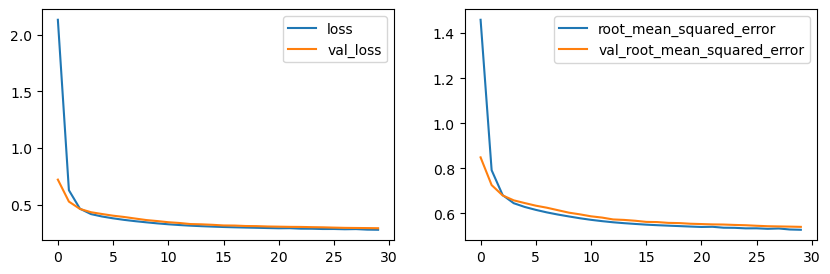

In [30]:
plot_metrics(model)

Very overfitting, But sequential is better than wide and deep network

In [31]:
model.evaluate(X_test, y_test)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 842us/step - loss: 0.2750 - root_mean_squared_error: 0.5239


[0.29944971203804016, 0.54721999168396]

In [32]:
model.export(filepath='mymodel')

INFO:tensorflow:Assets written to: mymodel\assets


INFO:tensorflow:Assets written to: mymodel\assets


Saved artifact at 'mymodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 8), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  2516448117504: TensorSpec(shape=(1, 8), dtype=tf.float32, name=None)
  2516448130528: TensorSpec(shape=(1, 8), dtype=tf.float32, name=None)
  2516448117152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516448131936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516441434592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516441448144: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516400690224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516400691280: TensorSpec(shape=(), dtype=tf.resource, name=None)


### Subclassing API

In [33]:
class mnist_model(tf.keras.Model):
    def __init__(self, n_units, activation, **kwargs):
        super().__init__(**kwargs)
        self.flatten = tf.keras.layers.Flatten()
        self.hidden1 = tf.keras.layers.Dense(n_units,activation= activation)
        self.hidden2 = tf.keras.layers.Dense(n_units,activation= activation)
        self.output_ = tf.keras.layers.Dense(10, activation='softmax')
    def call(self, input_):
        flatten = self.flatten(input_)
        hidden1 = self.hidden1(flatten)
        hidden2 = self.hidden2(hidden1)
        output = self.output_(hidden2)
        return output

In [34]:
mnist_model = mnist_model(50, 'sigmoid', name='mnist')

In [35]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [36]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [37]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test,test_size=.3, random_state=42)

In [38]:
X_valid.shape

(7000, 28, 28)

In [39]:
mnist_model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

mnist_model.fit(X_train, y_train, epochs=32, batch_size=32,validation_data=(X_valid, y_valid))

Epoch 1/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6896 - loss: 1.2002 - val_accuracy: 0.8731 - val_loss: 0.4317
Epoch 2/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8655 - loss: 0.4592 - val_accuracy: 0.8779 - val_loss: 0.4007
Epoch 3/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8797 - loss: 0.3967 - val_accuracy: 0.8841 - val_loss: 0.3757
Epoch 4/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8862 - loss: 0.3694 - val_accuracy: 0.8939 - val_loss: 0.3416
Epoch 5/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8937 - loss: 0.3505 - val_accuracy: 0.9037 - val_loss: 0.3217
Epoch 6/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8984 - loss: 0.3334 - val_accuracy: 0.9084 - val_loss: 0.3038
Epoch 7/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9004 - loss: 0.3265 - val_accuracy: 0.9056 - val_loss: 0.3089
Epoch 8/32
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9069 - loss: 0.3100 - 

In [40]:
mnist_hist_df = pd.DataFrame(mnist_model.history.history)

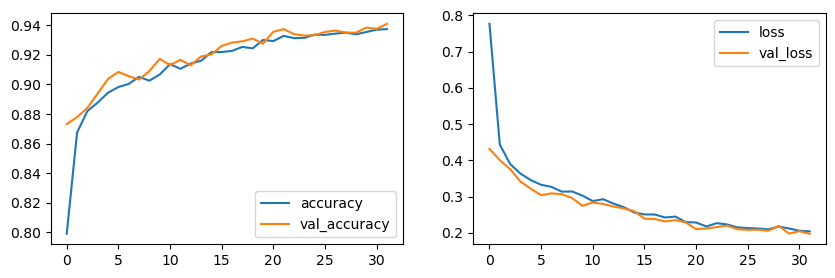

In [41]:
plot_metrics(mnist_model)

Very slightly overfitting

In [42]:
mnist_model.export('mnist_model')

INFO:tensorflow:Assets written to: mnist_model\assets


INFO:tensorflow:Assets written to: mnist_model\assets


Saved artifact at 'mnist_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  2516407672096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516407680368: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516407675968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516407680192: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516407666640: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2516407668048: TensorSpec(shape=(), dtype=tf.resource, name=None)


Callbacks: We can utilise callbacks such as EarlyStopping

In [43]:
mnist_model.compile(optimizer='adam', loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoints.weights.h5", save_best_only=True, save_weights_only=True)
mnist_model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9413 - loss: 0.1916 - val_accuracy: 0.9443 - val_loss: 0.1809
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9433 - loss: 0.1833 - val_accuracy: 0.9410 - val_loss: 0.1940
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9380 - loss: 0.2000 - val_accuracy: 0.9383 - val_loss: 0.2065
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9402 - loss: 0.2018 - val_accuracy: 0.9454 - val_loss: 0.1756
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9459 - loss: 0.1795 - val_accuracy: 0.9463 - val_loss: 0.1744
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9429 - loss: 0.1822 - val_accuracy: 0.9416 - val_loss: 0.1856
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9434 - loss: 0.1823 - val_accuracy: 0.9419 - val_loss: 0.1852
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9458 - loss: 0.1798 - 

In [44]:
mnist_model.load_weights(r"checkpoints.weights.h5")

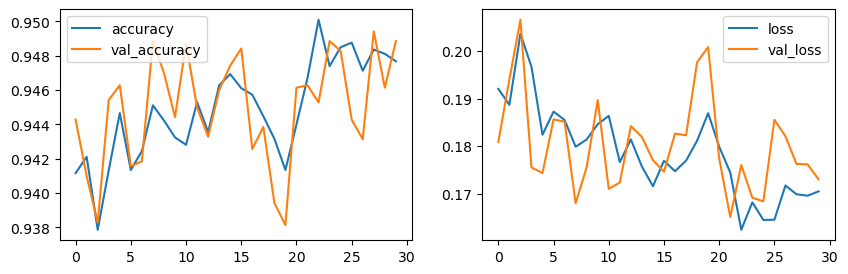

In [45]:
plot_metrics(mnist_model)

In [46]:
mnist_model.evaluate(X_test , y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 967us/step - accuracy: 0.9451 - loss: 0.1836


[0.17791493237018585, 0.9470000267028809]

Now early stopping callback

In [47]:
def recompile(model, optimizer=tf.keras.optimizers.Adam(), learning_rate=0.001, loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy']):
    
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [48]:
recompile(mnist_model, learning_rate=0.0005)
early_stopper= tf.keras.callbacks.EarlyStopping(patience=10,
                                                restore_best_weights=True)
mnist_model.fit(X_train, y_train,epochs=50, batch_size=32 ,validation_data=(X_valid, y_valid), callbacks=[checkpoint_cb, early_stopper])

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.9503 - loss: 0.1599 - val_accuracy: 0.9509 - val_loss: 0.1716
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9506 - loss: 0.1615 - val_accuracy: 0.9499 - val_loss: 0.1659
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9499 - loss: 0.1615 - val_accuracy: 0.9469 - val_loss: 0.1665
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9497 - loss: 0.1626 - val_accuracy: 0.9507 - val_loss: 0.1736
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9492 - loss: 0.1627 - val_accuracy: 0.9519 - val_loss: 0.1596
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.9508 - loss: 0.1609 - val_accuracy: 0.9509 - val_loss: 0.1668
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9518 - loss: 0.1607 - val_accuracy: 0.9504 - val_loss: 0.1620
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9537 - loss: 0.1515 - 

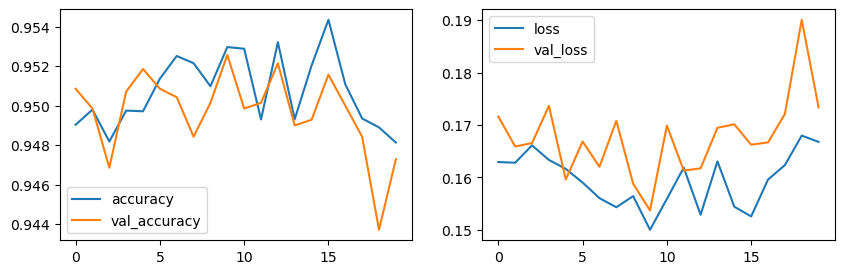

In [49]:
plot_metrics(mnist_model)

In [50]:
mnist_model.evaluate(X_test, y_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 956us/step - accuracy: 0.9534 - loss: 0.1761


[0.1723865568637848, 0.949999988079071]

In [51]:
mnist_model.save(filepath ='best_mnist_model.keras')

In [52]:
from pathlib import Path
from time import strftime
def get_run_log_dir(logdir='log_for_run'):
    return Path(logdir) / strftime("run_%Y_%m_%d_%H_%M_%S")

In [70]:
get_run_log_dir()

WindowsPath('log_for_run/run_2024_06_07_21_30_19')

In [69]:
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=get_run_log_dir(),profile_batch=(100,200))
recompile(mnist_model,optimizer=tf.keras.optimizers.Adamax(), learning_rate=0.001)
mnist_model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=25, batch_size=32,callbacks=tensorboard_cb)

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9680 - loss: 0.1064 - val_accuracy: 0.9589 - val_loss: 0.1454
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9694 - loss: 0.1038 - val_accuracy: 0.9591 - val_loss: 0.1433
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9690 - loss: 0.1037 - val_accuracy: 0.9586 - val_loss: 0.1436
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9693 - loss: 0.1031 - val_accuracy: 0.9590 - val_loss: 0.1424
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9693 - loss: 0.1031 - val_accuracy: 0.9590 - val_loss: 0.1432
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9692 - loss: 0.1028 - val_accuracy: 0.9596 - val_loss: 0.1416
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9698 - loss: 0.1018 - val_accuracy: 0.9597 - val_loss: 0.1420
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9699 - loss: 0.1017 - 

We can see that the model run after has better accuracy and loss

In [ ]:
%